In [32]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math

a = '050'
timeHistorySizeOfU=100
downsampling_factor=3


hf = h5py.File('data/Kornilov_Haeringer_all.h5', 'r')

input_size = math.ceil(timeHistorySizeOfU/downsampling_factor)

output_data = np.array(hf.get('BB_A' + a+ '_Q'))
input_data = np.array(hf.get('BB_A' + a+ '_U'))
time_data = np.array(hf.get('BB_time'))

output_data = output_data[::100]

input_data = input_data[::100]

time_data = time_data[::100]

Text(0, 0.5, 'Output Signal')

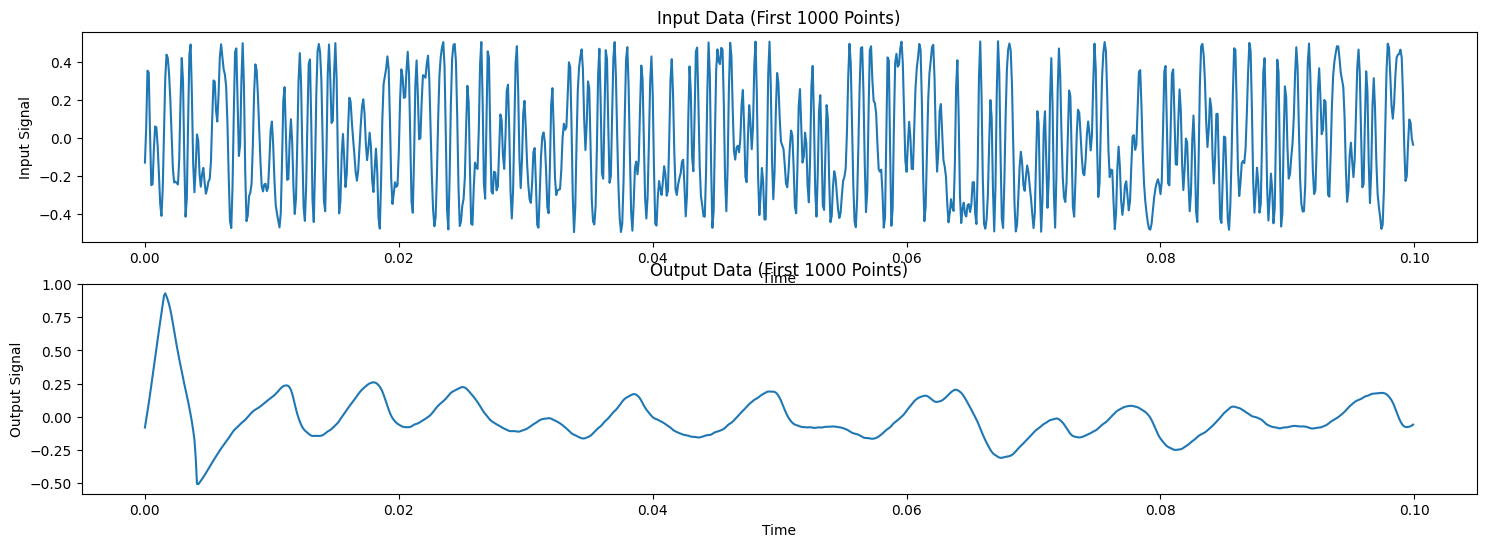

In [33]:
import matplotlib.pyplot as plt


# Plot the first 1000 points of input and output data
plt.figure(figsize=(18, 6))

# Plot input data
plt.subplot(2, 1, 1)
plt.plot(time_data[:1000], input_data[:1000])
plt.title('Input Data (First 1000 Points)')
plt.xlabel('Time')
plt.ylabel('Input Signal')

# Plot output data
plt.subplot(2, 1, 2)
plt.plot(time_data[:1000], output_data[:1000])
plt.title('Output Data (First 1000 Points)')
plt.xlabel('Time')
plt.ylabel('Output Signal')

In [34]:
from scipy.fft import fft, ifft

# Compute the FFT of both signals
fft_input = fft(input_data)
fft_output = fft(output_data)

In [35]:
# Compute power spectrum
power_spectrum_input = np.abs(fft_input)**2
power_spectrum_output = np.abs(fft_output)**2

# Define a function to get top energy frequencies
def top_energy_frequencies(power_spectrum, top_n=10):
    top_indices = np.argsort(power_spectrum)[-top_n:]
    return top_indices

# Define a function to get top entropy frequencies
def top_entropy_frequencies(power_spectrum, top_n=10):
    power_spectrum_normalized = power_spectrum / np.sum(power_spectrum)
    entropy_contributions = -power_spectrum_normalized * np.log(power_spectrum_normalized + np.finfo(float).eps)
    top_indices = np.argsort(entropy_contributions)[-top_n:]
    return top_indices

# Select top N frequencies
top_n = 5
top_energy_indices_input = top_energy_frequencies(power_spectrum_input, top_n)
top_energy_indices_output = top_energy_frequencies(power_spectrum_output, top_n)
top_entropy_indices_input = top_entropy_frequencies(power_spectrum_input, top_n)
top_entropy_indices_output = top_entropy_frequencies(power_spectrum_output, top_n)

In [36]:
# Create a function to reconstruct the signal using selected indices
def reconstruct_signal(fft_data, indices):
    filtered_fft = np.zeros_like(fft_data)
    filtered_fft[indices] = fft_data[indices]
    filtered_fft[-indices] = fft_data[-indices]  # Handle symmetric negative frequencies
    return np.real(ifft(filtered_fft))

# Reconstruct signals using top energy frequencies
reconstructed_input_energy = reconstruct_signal(fft_input, top_energy_indices_input)
reconstructed_output_energy = reconstruct_signal(fft_output, top_energy_indices_output)

# Reconstruct signals using top entropy frequencies
reconstructed_input_entropy = reconstruct_signal(fft_input, top_entropy_indices_input)
reconstructed_output_entropy = reconstruct_signal(fft_output, top_entropy_indices_output)


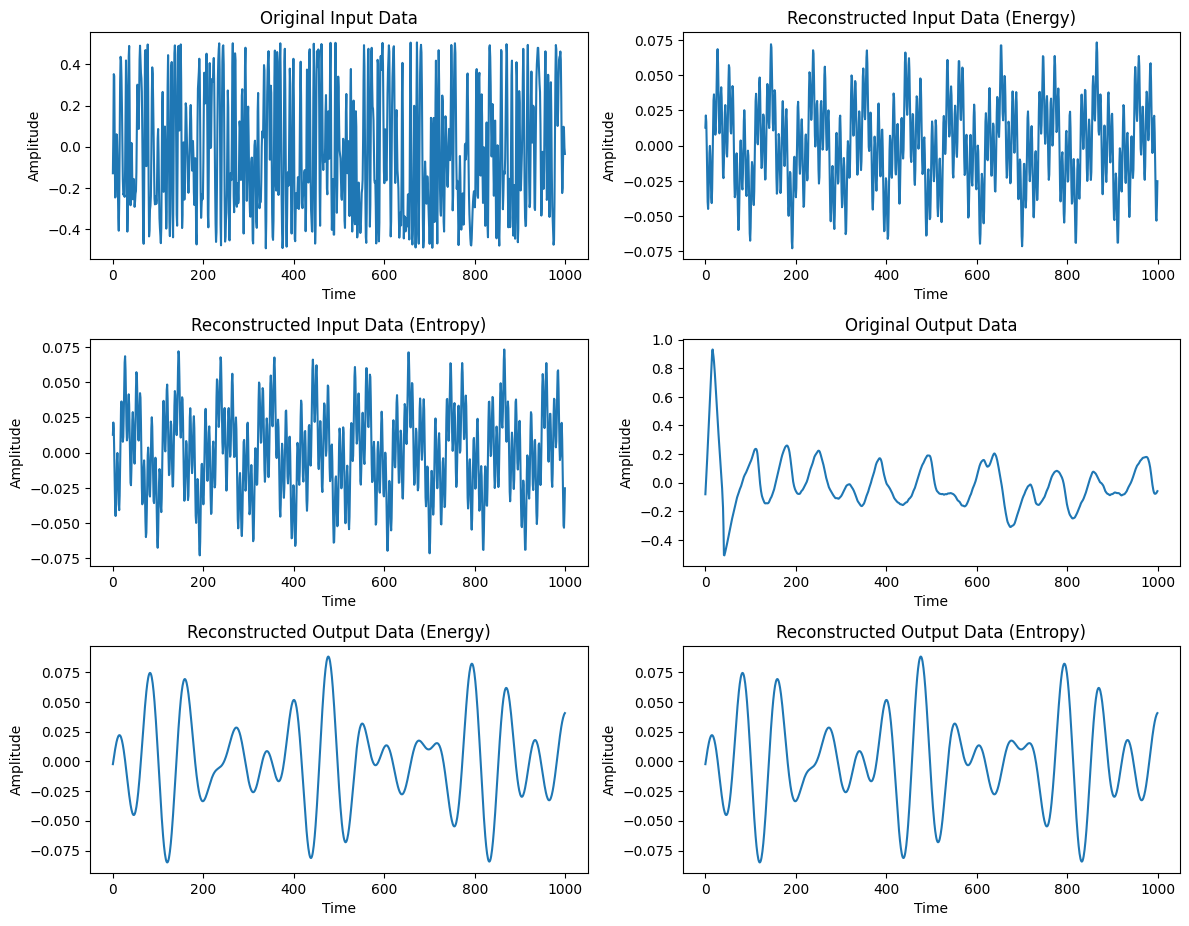

In [37]:
# Plot the original and reconstructed signals
plt.figure(figsize=(12, 12))

# Original input data
plt.subplot(4, 2, 1)
plt.plot(input_data[:1000])
plt.title('Original Input Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Reconstructed input data (energy)
plt.subplot(4, 2, 2)
plt.plot(reconstructed_input_energy[:1000])
plt.title('Reconstructed Input Data (Energy)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Reconstructed input data (entropy)
plt.subplot(4, 2, 3)
plt.plot(reconstructed_input_entropy[:1000])
plt.title('Reconstructed Input Data (Entropy)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Original output data
plt.subplot(4, 2, 4)
plt.plot(output_data[:1000])
plt.title('Original Output Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Reconstructed output data (energy)
plt.subplot(4, 2, 5)
plt.plot(reconstructed_output_energy[:1000])
plt.title('Reconstructed Output Data (Energy)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Reconstructed output data (entropy)
plt.subplot(4, 2, 6)
plt.plot(reconstructed_output_entropy[:1000])
plt.title('Reconstructed Output Data (Entropy)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()